# Life Expectancy
#### After testing with some datasets from kaggle i decided to build my own dataset.
The data from kaggle was rubbish, not scaled right, incomprehensible, and most of the time it looked made-up.  
The dataset i build contains:
 - Life expectancy
 - Education
 - GDP
 - BMI
 - happiness?
 - criminaliteit?
 - alcohol/drugs?
 - avg healtcare?
   
All This data is collected from:
 - data.world
 - worldbank.org
 - who.int

 

## Imports

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data exploration
I will explore each dataset separately and merge them all in the end.

## First dataset: Life Expectancy
this set contains the Life expectancy at birth in years per year

In [2]:
df_le = pd.read_csv('DATA/Life_expectancy.csv', skiprows=4)

In [3]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            235 non-null    float64
 5   1961            236 non-null    float64
 6   1962            236 non-null    float64
 7   1963            235 non-null    float64
 8   1964            235 non-null    float64
 9   1965            236 non-null    float64
 10  1966            236 non-null    float64
 11  1967            236 non-null    float64
 12  1968            236 non-null    float64
 13  1969            236 non-null    float64
 14  1970            237 non-null    float64
 15  1971            236 non-null    float64
 16  1972            236 non-null    float64
 17  1973            237 non-null    flo

I will drop the rows for 2019 and 2020 because they are completely empty.  
I will drop the columns of Indicator Name and Indicator Code to becous the don't have any significant value.

In [4]:
df_le.drop(["2019", "2020", 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [5]:
df_le = df_le.melt(id_vars=["Country Code", 'Country Name'])
df_le.rename(columns={'variable': 'Year', 'Country Name': 'Country', 'value': 'Life Expectancy'}, inplace=True)

In [6]:
df_le.head()

,Country Code,Country,Year,Life Expectancy
0,ABW,Aruba,1960,65.662
1,AFG,Afghanistan,1960,32.446
2,AGO,Angola,1960,37.524
3,ALB,Albania,1960,62.283
4,AND,Andorra,1960,NaN


In [7]:
df_wld = df_le[df_le['Country Code']=='WLD']

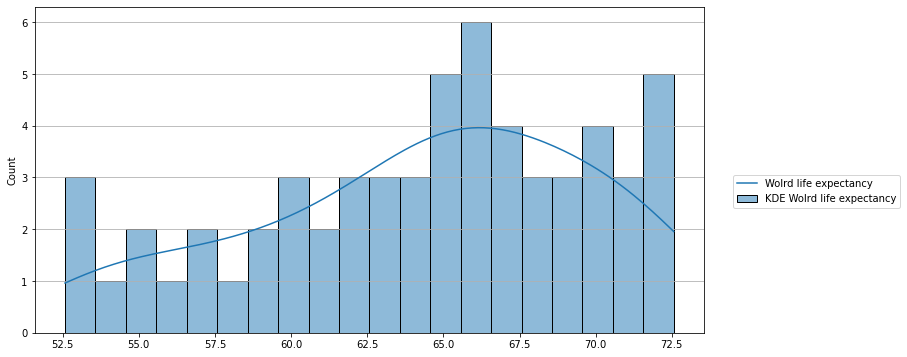

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(df_wld, bins=20, kde=True)
plt.legend(labels=['Wolrd life expectancy','KDE Wolrd life expectancy'], bbox_to_anchor=(1.3, 0.5))
plt.grid(axis='y')

### Nan value's in the dataset
Let's look at the amount of nan in the set.  

In [81]:
print('empty values in the dataset: ' + str((df_le.isnull().values.ravel().sum())))
print('% of empty values in the dataset: ' + str(round((df_le.isnull().values.ravel().sum()/len(df_le)*100),2)))

empty values in the dataset: 1331
% of empty values in the dataset: 8.55


There are 1331 empty values in the Life Expectancy column.  
It looks like there is 8.5% data missing.

## Second dataset: Education
This dataset shows 4 different mesurmenst of education in a country:
- Government expenditure on education as % of GDP (%)
- Gross enrolment ratio, primary, female (%)
- Gross enrolment ratio, primary, gender parity index (GPI)
- Out-of-school children of primary school age, both sexes (number)

In [84]:
df_edu = pd.read_csv('DATA/Education.csv', skipfooter=5, engine='python')
df_edu.drop(["2019", "2020"], axis=1, inplace=True)

In [85]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ï»¿Country Name  1072 non-null   object
 1   Series           1072 non-null   object
 2   1987             1072 non-null   object
 3   1988             1072 non-null   object
 4   1989             1072 non-null   object
 5   1990             1072 non-null   object
 6   1991             1072 non-null   object
 7   1992             1072 non-null   object
 8   1993             1072 non-null   object
 9   1994             1072 non-null   object
 10  1995             1072 non-null   object
 11  1996             1072 non-null   object
 12  1997             1072 non-null   object
 13  1998             1072 non-null   object
 14  1999             1072 non-null   object
 15  2000             1072 non-null   object
 16  2001             1072 non-null   object
 17  2002             1072 non-null   

In [86]:
df_edu = df_edu.melt(id_vars=["ï»¿Country Name", 'Series'])

In [87]:
df_edu.rename(columns={'variable': 'Year', 'ï»¿Country Name': 'Country'}, inplace=True)
df_edu.replace('..',np.NaN, inplace=True)
df_edu['value'] = df_edu['value'].astype(float)
df_edu['Year'] = df_edu['Year'].astype(int)

In [88]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34304 entries, 0 to 34303
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  34304 non-null  object 
 1   Series   34304 non-null  object 
 2   Year     34304 non-null  int32  
 3   value    20963 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 938.1+ KB


In [89]:
df_edu

,Country,Series,Year,value
0,Afghanistan,Government expenditure on education as % of GD...,1987,NaN
1,Afghanistan,"Gross enrolment ratio, primary, female (%)",1987,NaN
2,Afghanistan,"Gross enrolment ratio, primary, gender parity ...",1987,NaN
3,Afghanistan,"Out-of-school children of primary school age, ...",1987,NaN
4,Albania,Government expenditure on education as % of GD...,1987,NaN
...,...,...,...,...
34299,Zambia,"Out-of-school children of primary school age, ...",2018,NaN
34300,Zimbabwe,Government expenditure on education as % of GD...,2018,5.87135
34301,Zimbabwe,"Gross enrolment ratio, primary, female (%)",2018,NaN
34302,Zimbabwe,"Gross enrolment ratio, primary, gender parity ...",2018,NaN


In [90]:
df_temp = df_edu[(df_edu['Country']=='World') & (df_edu['Series']=='Gross enrolment ratio, primary, female (%)')]
#df_temp = df_temp[df_temp.Year != 2020]

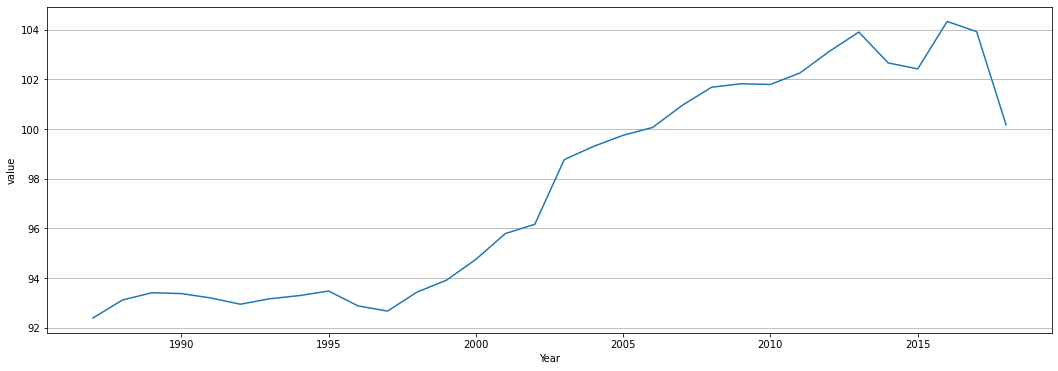

In [91]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_temp, x='Year', y='value', markers=True, dashes=False)
plt.grid(axis='y')

### Nan value's in the dataset
Let's look at the amount of nan in the set.  

In [101]:
print('empty values in the dataset: ' + str((df_edu.isna().values.sum())))
print('% of empty values in the dataset: ' + str(round((df_edu.isna().values.sum()/len(df_edu)*100),2)))

empty values in the dataset: 13341
% of empty values in the dataset: 38.89


There are 13341 empty values in the value column.  
It looks like there is 38.9% data missing.  
  
Lets look at each missing value per serie

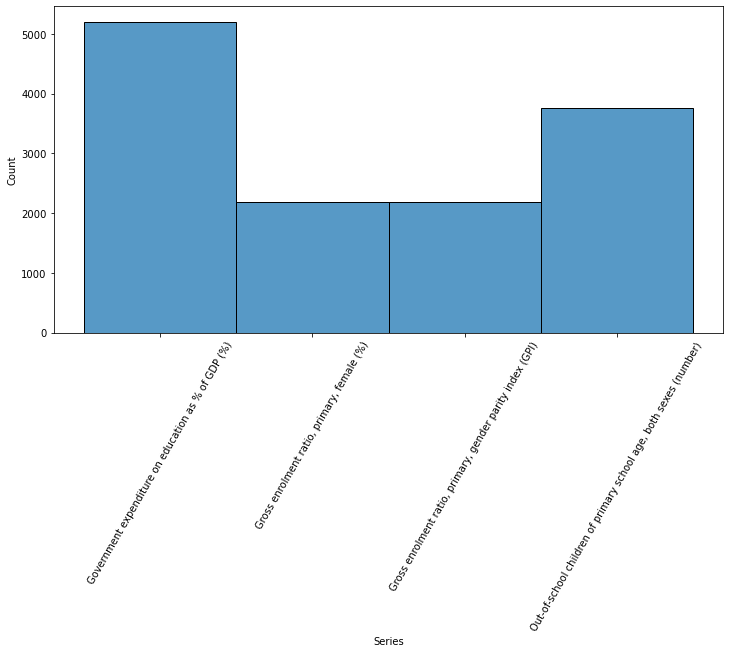

In [151]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_edu[df_edu['value'].isna()], x='Series')
plt.xticks(rotation=60)
plt.show()

In [148]:
df_nan = df_edu[df_edu['value'].isna()].groupby(['Series'])
df_nan = df_nan.count()['Country']
df_len = len(df_edu[df_edu['value'].isna()])

let's see which serie has the most missing data.

In [152]:
round((df_nan/df_len)*100,2)

Series
Government expenditure on education as % of GDP (%)                  38.97
Gross enrolment ratio, primary, female (%)                           16.45
Gross enrolment ratio, primary, gender parity index (GPI)            16.45
Out-of-school children of primary school age, both sexes (number)    28.14
Name: Country, dtype: float64

## Third dataset: GDP
This dataset shows the GDP per capita per country

In [62]:
df_GDP = pd.read_csv('DATA/GDP_PPP.csv', skiprows=4)

In [63]:
df_GDP.drop(['Indicator Name', 'Indicator Code', '2019', "2020"], axis=1, inplace=True)
df_GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       264 non-null    object 
 1   Country Code  264 non-null    object 
 2   1960          131 non-null    float64
 3   1961          132 non-null    float64
 4   1962          135 non-null    float64
 5   1963          135 non-null    float64
 6   1964          135 non-null    float64
 7   1965          144 non-null    float64
 8   1966          148 non-null    float64
 9   1967          152 non-null    float64
 10  1968          156 non-null    float64
 11  1969          156 non-null    float64
 12  1970          167 non-null    float64
 13  1971          168 non-null    float64
 14  1972          168 non-null    float64
 15  1973          168 non-null    float64
 16  1974          169 non-null    float64
 17  1975          172 non-null    float64
 18  1976          173 non-null    

In [64]:
df_GDP.head()

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.453710,23512.602600,24985.993280,24713.698050,26189.435510,26647.938100,27980.880700,28281.350480,29007.693000,NaN
1,Afghanistan,AFG,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,...,438.076034,543.303042,591.162759,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.140114,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43503.185520,40852.666780,43335.328860,38686.461260,39538.766720,41303.929370,35762.523070,37474.665410,38962.880350,41793.055260


In [65]:
df_GDP = df_GDP.melt(id_vars=["Country", 'Country Code'], value_vars=['1960','1961','1962','1963','1964','1965',
 '1966','1967','1968','1969','1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
 '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
 '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
 '2013', '2014', '2015', '2016', '2017', '2018'])
df_GDP.rename(columns={'variable': 'Year', 'value': 'GDP'}, inplace=True)
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       15576 non-null  object 
 1   Country Code  15576 non-null  object 
 2   Year          15576 non-null  object 
 3   GDP           12168 non-null  float64
dtypes: float64(1), object(3)
memory usage: 486.9+ KB


In [66]:
data=df_GDP[df_GDP['Country']=='World']

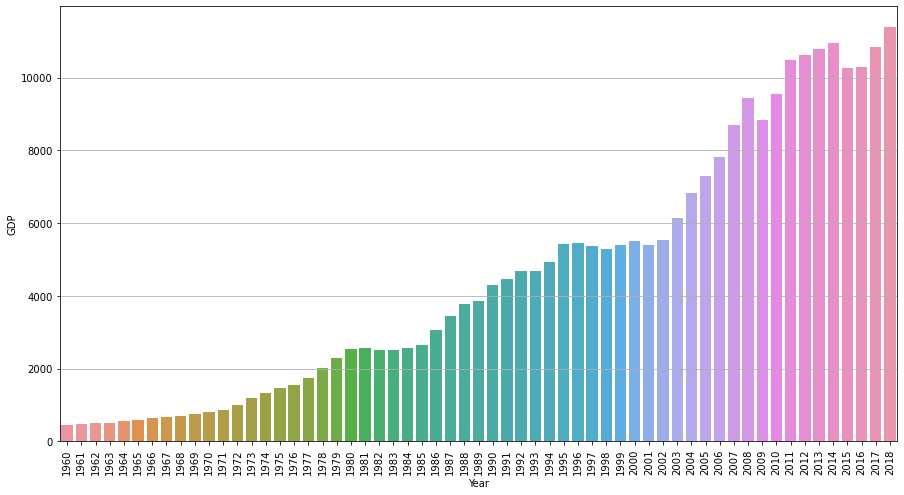

In [67]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Year', y='GDP')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### Nan value's in the dataset
Let's look at the amount of nan in the set.
It looks like there is 21.9% data missing.

In [68]:
df_GDP.isna().sum()['GDP']/len(df_GDP)*100

21.879815100154083